So the aim here is to create a machine learning algorithm that the company can use to determine the clients that it should target in order to enroll them as new customers. We are therefore trying to classify whether a customer is likely to buy car insurance from the company or not and hence this is a binary classification task.

HAVE TO ADD IN SOME ANALYSIS AND EVALUATION OF HOW THIS IS AN UNBALANCED DATASET 
IMPLEMENT SOMETHING LIKE THIS
1. Random Undersampling and Oversampling. A widely adopted and perhaps the most straightforward method for dealing with highly imbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

ANALYSIS SINCE WE HAVE LESS POSITIVE CASES THIS ALGORITHMS RECALL METRIC IS ESSENTIAL 
- WE WANT TO MAXIMISE THIS 

In [37]:
import pickle as p 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd 
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, GridSearchCV
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt

In [33]:

train_df = pd.read_csv('C:/Users/lhaye/Documents/Genesys_Task_Dataset/carInsurance_train.csv')
test_df = pd.read_csv('C:/Users/lhaye/Documents/Genesys_Task_Dataset/carInsurance_test.csv')

print(train_df['Id'])

#LETS PUT THE COLUMNS INTO A LIST SO WE CAN SEE WHICH ONES CORRESPOND TO FEATURES AND WHICH TO 
columns = train_df.columns.tolist()
feature_columns = columns[:-1]
output_column = columns[-1:]
num_train_samples = train_df.shape[0]

print(columns)

#Okay so lets do some analysis of the data 
#print(train_df.shape)

#We can see from this that we have many categorical features which we will have to transform into numeric features
#print(train_df.info)

#Lets also check the types and we can see that the object type represents a categorical feature which we will have to change
#print(train_df.dtypes)

#Any preprocessing we do should be done in a function because we will have to do the same for the test set 
#We need to check for and deal with the following if they are present:
#1 Missing data (na or nan)
#2 Duplicate data - samples that are present twice - we can just remove one if they are identical 
#3 Modify categorical features
#4 Outliers - values that are very high for example we can see that there has been 12 previous attempts to contact one customer
#5 Create some new features from the data
#6 Remove irrelevant features/columns 
 

#Lets get the preprocessed data and then make alterations to it based on the model score 
def preprocess_data(data):
    
    print(data)
    #1 Missing data 
    #print(data.isnull().sum())
    #We can see that the columns with missing data is present where we have categorical data so when we change these 
    #to numeric data we can simply add in a value to represent NA - This should sort this issue 
    
    #2 Duplicate data
    duplicate_rows_df = data[data.duplicated()]
    #print('number of duplicate rows: ', duplicate_rows_df.shape)
    #We can see we have zero duplicated rows of data 
    
    
    #3 Modify all data that is Na with a word to avoid difficulties 
    data['Education'] = data['Education'].fillna("NoVal")
    data['Job'] = data['Job'].fillna("NoVal")
    data['Communication'] = data['Communication'].fillna("NoVal")
    data['Outcome'] = data['Outcome'].fillna("NoVal")

    #We tranlsate the categorical labels into numeric labels 
    ord_enc = OrdinalEncoder()
    #print(data)
    data["Education"] = ord_enc.fit_transform(data[["Education"]])
    data["Marital"] = ord_enc.fit_transform(data[["Marital"]])
    data["Job"] = ord_enc.fit_transform(data[["Job"]])
    data["Outcome"] = ord_enc.fit_transform(data[["Outcome"]])
    data["Communication"] = ord_enc.fit_transform(data[["Communication"]])

    #Create a feature for the duration of the call 
    data['CallStart'] = pd.to_datetime(data["CallStart"])
    data['CallEnd'] = pd.to_datetime(data["CallEnd"])

    data['CallStart'] = (data['CallStart'].dt.hour*60+data['CallStart'].dt.minute)*60 + data['CallStart'].dt.second
    data['CallEnd'] = (data['CallEnd'].dt.hour*60+data['CallEnd'].dt.minute)*60 + data['CallEnd'].dt.second
    
    data['CallDuration'] = data['CallEnd'] - data['CallStart']
    #Now we have the feature and some of the values are quite large so perhaps they should be normalised 
    
    #Now we should drop some features that we dont need 
    data = data.drop(['Id', 'LastContactDay', 'LastContactMonth', 'CallStart', 'CallEnd'], axis=1)
    
    #Now we need to normalise/put into smaller values the following columns
    # Balance
    # DaysPassed
    # NoOfContacts
    
    #NORMALIZATION WE CAN TAKE THIS OUT DEPENDENT ON WHAT ALGORITHM WE USE 
    # Maybe because the max is so infrequent we should do a different form of normalization but we can see later
    data['Balance'] = (data['Balance'] - data['Balance'].min()) / (data['Balance'].max() - data['Balance'].min())
    data['NoOfContacts'] = (data['NoOfContacts'] - data['NoOfContacts'].min()) / (data['NoOfContacts'].max() - data['NoOfContacts'].min())
    data['Age'] = (data['Age'] - data['Age'].min()) / (data['Age'].max() - data['Age'].min())
    data['DaysPassed'] = (data['DaysPassed'] - data['DaysPassed'].min()) / (data['DaysPassed'].max() - data['DaysPassed'].min())
    data['PrevAttempts'] = (data['PrevAttempts'] - data['PrevAttempts'].min()) / (data['PrevAttempts'].max() - data['PrevAttempts'].min())
    data['CallDuration'] = (data['CallDuration'] - data['CallDuration'].min()) / (data['CallDuration'].max() - data['CallDuration'].min())
    data['Job'] = (data['Job'] - data['Job'].min()) / (data['Job'].max() - data['Job'].min())
    data['Education'] = (data['Education'] - data['Education'].min()) / (data['Education'].max() - data['Education'].min())
    data['Marital'] = (data['Marital'] - data['Marital'].min()) / (data['Marital'].max() - data['Marital'].min())
    data['Communication'] = (data['Communication'] - data['Communication'].min()) / (data['Communication'].max() - data['Communication'].min())

    print(data)
    
    print(len(data))
    
    return data
    #Okay so now we have the features we need so we can return them and see how it would go on a dataset
    
    


0          1
1          2
2          3
3          4
4          5
        ... 
3995    3996
3996    3997
3997    3998
3998    3999
3999    4000
Name: Id, Length: 4000, dtype: int64
['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay', 'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'Outcome', 'CallStart', 'CallEnd', 'CarInsurance']


In [10]:
x_train_processed = preprocess_data(train_df)
print(len(output_column))
y_train_vals = train_df[output_column]
x_train_processed = x_train_processed.drop(labels='CarInsurance', axis=1)


print(x_train_processed)

4000
1
           Age       Job  Marital  Education  Default   Balance  HHInsurance  \
0     0.181818  0.454545      1.0   1.000000        0  0.042138            1   
1     0.181818  0.181818      0.5   0.333333        0  0.041527            1   
2     0.142857  0.454545      1.0   1.000000        0  0.036413            1   
3     0.090909  0.818182      1.0   0.333333        0  0.033811            1   
4     0.155844  0.454545      0.5   1.000000        0  0.056684            0   
...        ...       ...      ...        ...      ...       ...          ...   
3995  0.129870  0.909091      1.0   1.000000        0  0.030136            1   
3996  0.402597  0.090909      0.0   0.666667        0  0.031357            1   
3997  0.116883  0.090909      1.0   0.666667        0  0.026194            0   
3998  0.233766  0.272727      1.0   1.000000        0  0.036620            1   
3999  0.350649  0.727273      0.5   0.333333        0  0.031486            1   

      CarLoan  Communication  No

In [11]:
#create a dataframe with the train and test 
#train_df = pd.concat([x_train, y_train], axis=1)

#print(x_train_processed)
#print(len(y_train))

#Now we should create a train and validation split of the data and do some predictions
X_train, X_test, y_train, y_test = train_test_split(x_train_processed, y_train_vals, test_size=0.2, random_state=42)

y_test = y_test['CarInsurance']

print(X_train)
#print(y_train)

           Age       Job  Marital  Education  Default   Balance  HHInsurance  \
3994  0.389610  0.181818      0.5   0.666667        0  0.030145            0   
423   0.181818  0.181818      0.5   0.333333        0  0.030136            1   
2991  0.493506  0.909091      0.5   0.666667        0  0.055344            0   
1221  0.363636  0.454545      0.5   1.000000        0  0.030136            0   
506   0.246753  0.181818      0.5   0.666667        0  0.034954            1   
...        ...       ...      ...        ...      ...       ...          ...   
1130  0.480519  0.000000      0.5   1.000000        0  0.030136            0   
1294  0.337662  0.909091      0.5   0.666667        0  0.165745            1   
860   0.298701  0.181818      0.5   0.333333        0  0.032560            0   
3507  0.194805  0.909091      0.5   0.666667        0  0.035625            0   
3174  0.181818  0.181818      0.5   0.666667        0  0.037182            1   

      CarLoan  Communication  NoOfConta

In [12]:
#Now lets run using k-fold cross validation to get the best 
#We will run them with some standard parameters just to get an idea of the best 3 and then do some further analysis on those
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scoring = ['accuracy']

models = [
          ('Logistic Regression', LogisticRegression()), 
          ('Support Vector Machine Linear', svm.SVC(kernel='linear', gamma='auto')),
          ('Support Vector Machine Rbf', svm.SVC(kernel='rbf', gamma='auto')),
          ('Support Vector Machine NuSVC', svm.NuSVC(gamma='auto')), 
          ('Random Forest', RandomForestClassifier(n_estimators = 100, random_state=1)),
          ('Decision Tree', DecisionTreeClassifier(max_depth=1)),
          ('K-Nearest Neighbours', KNeighborsClassifier(n_neighbors=5)), 
          ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
          ('Naive Bayes', MultinomialNB()),
          ('Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=1)), 
          ('Ensemble', VotingClassifier(estimators=[('boost', GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=1)), ('SVM', svm.NuSVC(gamma='auto')) , ('rf', RandomForestClassifier(n_estimators = 100, random_state=1))], voting = 'hard'))
        ]

results = {}

for name, model in models:

    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=1)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    avg_accuracy = np.mean(cv_results['test_accuracy']) * 100 
    print(f"The {name} achieves a mean accuracy result of {avg_accuracy} over a 10-fold validation set")
    results[name] = avg_accuracy
    

The Logistic Regression achieves a mean accuracy result of 79.40625 over a 10-fold validation set
The Support Vector Machine Linear achieves a mean accuracy result of 79.8125 over a 10-fold validation set
The Support Vector Machine Rbf achieves a mean accuracy result of 76.6875 over a 10-fold validation set
The Support Vector Machine NuSVC achieves a mean accuracy result of 80.3125 over a 10-fold validation set
The Random Forest achieves a mean accuracy result of 81.71875 over a 10-fold validation set
The Decision Tree achieves a mean accuracy result of 73.625 over a 10-fold validation set
The K-Nearest Neighbours achieves a mean accuracy result of 74.65625000000001 over a 10-fold validation set
The Linear Discriminant Analysis achieves a mean accuracy result of 78.90625 over a 10-fold validation set
The Naive Bayes achieves a mean accuracy result of 65.28124999999999 over a 10-fold validation set
The Boosting achieves a mean accuracy result of 82.09375 over a 10-fold validation set
Th

In [13]:
top_3_models = sorted(results, key=results.get, reverse=True)[:3]

for i in range(len(top_3_models)):
    if(i == 0):
        print("The models with the top 3 results are: ")
        print("-", top_3_models[i])
    else:
        print("-", top_3_models[i])

The models with the top 3 results are: 
- Ensemble
- Boosting
- Random Forest


In [348]:
#Now lets take the top 3 and get the best parameters using grid search and then do some analysis of the scores of them
#('Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=1)), 
#('Random Forest', RandomForestClassifier(n_estimators = 100, random_state=1)),
#('Support Vector Machine NuSVC', svm.NuSVC(gamma='auto')), 

#RFModel = RandomForestClassifier(random_state=1)

#By doing this grid search we are essentially searchinf for the parameters that reduve overfitting the most

#param_grid  = { 
    #Number of trees to create 
    #The more this is the less likely overfitting is as it becomes less and less like a decision tree 
    #'n_estimators': [40, 60, 80, 100, 200, 500],
    #How many features we consider per tree as a starting point 
    #The lower this is the less likely overfitting is 
    #'max_features': ['auto', 'sqrt', 'log2'],
    #How large is the trees max depth 
    #'max_depth' : [5,6,7,8,9,10,13],
    #Which impurity measure to use in the split
    #'criterion' :['gini', 'entropy']
#}

#CV_rfc = GridSearchCV(estimator=RFModel, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X_train, y_train)
#print(CV_rfc.best_params_)


#Grid search for Boosting 
#BoostingModel = GradientBoostingClassifier(random_state=1)

param_grid  = { 
    #Number of boosting stages to carry out 
    'n_estimators': [100, 200, 400, 500, 800],
    #How many features we consider per tree as a starting point 
    'learning_rate': [0.001, 0.005, 0.01, 0.1, 0.5],
    #How large is the trees max depth 
    'max_depth' : [3,4,5,7,9],
    #Which impurity measure to use in the split
    'max_features': ['auto', 'sqrt', 'log2'],
}

CV_rfc = GridSearchCV(estimator=BoostingModel, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)


#SVMModel = svm.NuSVC()

#param_grid = {'nu': [0.1, 0.3, 0.5, 0.7, 0.9], 
              #'gamma': ['scale', 'auto'],
              #'kernel': ['linear', 'poly', 'rbf']}

#CV_SVM = GridSearchCV(estimator=SVMModel, param_grid=param_grid, cv= 5)
#CV_SVM.fit(X_train, y_train)
#print(CV_SVM.best_params_)


{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}


In [14]:
#Best parameters for the Random Forest Model
#{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 60}
RFModel = RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= 'auto', n_estimators= 60, random_state=1)

#Best parameters for the Boosting Model
#{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
BoostingModel = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features='sqrt', n_estimators=500, random_state=1)

#Best parameters for the SVM Model 
#{'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.5}
SVMModel = svm.NuSVC(gamma = 'auto', kernel = 'rbf', nu = 0.5)

#Ensemble model combines all 3 
Ensemble = VotingClassifier(estimators=[('boost', BoostingModel), ('SVM', SVMModel) , ('rf', RFModel)], voting = 'hard')

models = [
          ('Random Forest Model', RFModel),
          ('Support Vector Machine NuSVC', SVMModel), 
          ('Boosting', BoostingModel), 
          ('An Ensemble', Ensemble)
        ]

for name, model in models:

    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=1)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    avg_accuracy = np.mean(cv_results['test_accuracy']) * 100 
    print(f"The {name} achieves a mean accuracy result of {avg_accuracy} over a 10-fold validation set")

#So boosting is the best algorithm 

#Take the model with the best accuracy and do some analysis on it 
#1 Accuracy 
#2 Precision
#3 Recall
#4 F1 score 
#5 Some graphs 




The Random Forest Model achieves a mean accuracy result of 82.21875 over a 10-fold validation set
The Support Vector Machine NuSVC achieves a mean accuracy result of 80.3125 over a 10-fold validation set
The Boosting achieves a mean accuracy result of 82.71875 over a 10-fold validation set
The An Ensemble achieves a mean accuracy result of 82.37500000000001 over a 10-fold validation set


In [103]:
#Boosting is the best algorithm so lets do some analysis 

#This will give the Precision, Recall and the F1 score
print("Results for the Boosting Model: ")
BoostingModel.fit(X_train, y_train)
Boosting_predictions = BoostingModel.predict(X_test)
BoostingReport = classification_report(y_test, Boosting_predictions)
print(BoostingReport)

print()
print()

print("Results for the Ensemble Model: ")

Ensemble.fit(X_train, y_train)
Ensemble_predictions = Ensemble.predict(X_test)
EnsembleReport = classification_report(y_test, Ensemble_predictions)
print(EnsembleReport)

print()
print()

print("Results for the Random Forest Model: ")
RFModel.fit(X_train, y_train)
RFModel_predictions = RFModel.predict(X_test)
RFModelReport = classification_report(y_test, RFModel_predictions)
print(RFModelReport)

print()
print()

print("Results for the SVM Model: ")
SVMModel.fit(X_train, y_train)
SVM_predictions = SVMModel.predict(X_test)
SVMReport = classification_report(y_test, SVM_predictions)
print(SVMReport)



Results for the Boosting Model: 
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       484
           1       0.78      0.78      0.78       316

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.83      0.82      0.83       800

           Age       Job  Marital  Education  Default   Balance  HHInsurance  \
555   0.493506  0.272727      0.5   1.000000        0  0.036965            0   
3491  0.272727  0.454545      0.5   1.000000        0  0.236413            0   
527   0.077922  0.454545      1.0   1.000000        0  0.034008            0   
3925  0.272727  0.181818      0.0   0.666667        0  0.030549            1   
2989  0.168831  0.727273      0.5   0.666667        0  0.034205            1   
...        ...       ...      ...        ...      ...       ...          ...   
1922  0.298701  0.181818      0.5   0.666667        0  0.030717            1   


In [16]:
#This will give us a confusion martrix with True Positive, True Negative, False Positive and False Negatives
#As we can see it doesn't get many more wrong in one or the other but the correct ratio is much lower because we have less
#to train on 

print("Boosting Model Confusion Matrix:")
matrix = confusion_matrix(y_test, Boosting_predictions)
print(matrix)

print()
print()

print("Ensemble Model Confusion Matrix:")
matrix = confusion_matrix(y_test, Ensemble_predictions)
print(matrix)

print()
print()

print("Random Forest Model Confusion Matrix:")
matrix = confusion_matrix(y_test, RFModel_predictions)
print(matrix)

print()
print()

print("SVM Model Confusion Matrix:")
matrix = confusion_matrix(y_test, SVM_predictions)
print(matrix)

#[[A B]
#[C D]]

#We want B to be as Low as possible and D to be as high as possible 
#To me atleast it is more important to classify as many False Negative samples as possible and this means keeping
#True Neagtives as low as possible 
#The fact that this dataset is unbalanced causes the algorithms to be better at classifying negative samples
#Perhaps I should attepmt to balance the dataset and try again 

Boosting Model Confusion Matrix:
[[413  71]
 [ 69 247]]


Ensemble Model Confusion Matrix:
[[416  68]
 [ 72 244]]


Random Forest Model Confusion Matrix:
[[412  72]
 [ 67 249]]


SVM Model Confusion Matrix:
[[432  52]
 [111 205]]


In [18]:
p.dump(RFModel, open('RandomForest.pickle', 'wb'))

In [382]:
#This will give the Area Under the ROC Curve
scoring = 'roc_auc'
results = model_selection.cross_val_score(BoostingModel, X_test, y_test, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

results = model_selection.cross_val_score(RFModel, X_test, y_test, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

results = model_selection.cross_val_score(SVMModel, X_test, y_test, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.886 (0.047)
AUC: 0.890 (0.041)
AUC: 0.887 (0.035)


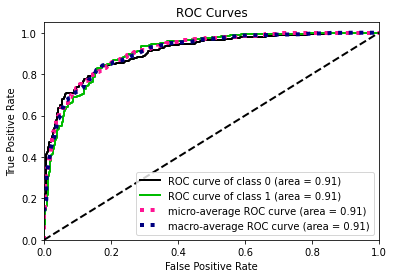

In [388]:
#ROC Curve for the Boosting Model
y_preds = BoostingModel.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_preds)
plt.show()

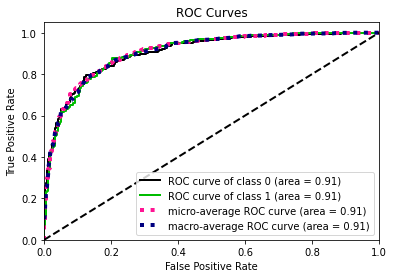

In [389]:
#ROC Curve for the Random Forest Model
y_preds = RFModel.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_preds)
plt.show()

In [ ]:
#With all the factors taken into account I think the Random Forest is best to use 
#Now we move to the REST API Part

In [34]:
test_data = test_df.iloc[0]

x_test_processed = preprocess_data(test_df)
print(x_test_processed)
x_test_processed = x_test_processed.drop(labels='CarInsurance', axis=1)
y_test_vals = test_df[output_column]


       Id  Age         Job  Marital  Education  Default  Balance  HHInsurance  \
0    4001   25      admin.   single  secondary        0        1            1   
1    4002   40  management  married   tertiary        0        0            1   
2    4003   44  management   single   tertiary        0    -1313            1   
3    4004   27    services   single  secondary        0     6279            1   
4    4005   53  technician  married  secondary        0     7984            1   
..    ...  ...         ...      ...        ...      ...      ...          ...   
995  4996   31      admin.   single  secondary        0      131            1   
996  4997   52  management  married   tertiary        0     2635            0   
997  4998   46  technician  married   tertiary        0     3009            0   
998  4999   60     retired  married  secondary        0     7038            0   
999  5000   28  management   single   tertiary        0      957            0   

     CarLoan Communication 

In [35]:
print(x_test_processed)

          Age       Job  Marital  Education  Default   Balance  HHInsurance  \
0    0.094595  0.090909      1.0   0.666667        0  0.045425            1   
1    0.297297  0.454545      0.5   1.000000        0  0.045402            1   
2    0.351351  0.454545      1.0   1.000000        0  0.015295            1   
3    0.121622  0.727273      1.0   0.666667        0  0.189383            1   
4    0.472973  0.909091      0.5   0.666667        0  0.228480            1   
..        ...       ...      ...        ...      ...       ...          ...   
995  0.175676  0.090909      1.0   0.666667        0  0.048406            1   
996  0.459459  0.454545      0.5   1.000000        0  0.105824            0   
997  0.378378  0.909091      0.5   1.000000        0  0.114400            0   
998  0.567568  0.545455      0.5   0.666667        0  0.206787            0   
999  0.135135  0.454545      1.0   1.000000        0  0.067347            0   

     CarLoan  Communication  NoOfContacts  DaysPass

In [183]:
#and here will be the client 
import requests
import json

#This is to test the 
url = 'http://127.0.0.1:1080/predict'  # localhost and the defined port + endpoint

new = x_test_processed.iloc[0].to_json(orient='split')

response = requests.post(url, json=new)
print(response.json())



#Now we want to retrain the model 
#So we will pass the training set again just to test 
#X_train, y_train 

url = 'http://127.0.0.1:1080/predict'  # localhost and the defined port + endpoint

X_train['CarInsurance'] = y_train 
comb_df = X_train

new = comb_df.to_json(orient='split')

response = requests.post(url, json=new)
print(response.json())

{'Prediction': 0}
{"columns":["Age","Job","Marital","Education","Default","Balance","HHInsurance","CarLoan","Communication","NoOfContacts","DaysPassed","PrevAttempts","Outcome","CallDuration","CarInsurance"],"index":[3994,423,2991,1221,506,3860,3563,1123,2512,500,1108,1281,549,557,1601,602,442,1779,218,2107,897,736,3323,2480,3816,2059,1904,3382,1666,3958,2829,3130,3341,2481,1204,1159,2290,1533,805,2706,1874,3275,578,2279,3418,1362,0,3426,3728,3845,964,3253,1011,247,1425,2111,3976,3407,3793,1509,3515,650,1967,2046,1558,3800,175,278,1135,3552,2484,2430,2529,3519,691,3961,416,2889,217,2488,1971,3405,3111,903,2925,912,3469,727,3755,3079,2825,2155,449,1395,376,3142,1752,3966,433,952,371,3277,2396,1421,700,2867,644,1457,665,1503,1427,1632,2420,1480,1164,794,3591,246,3815,734,505,2440,1189,3372,3443,1614,532,932,108,1867,949,2413,2948,3205,2223,2974,3957,543,1765,2494,2934,259,1514,1778,1862,1295,927,612,2631,1231,219,3129,485,2316,2164,3521,2992,258,3842,386,847,2573,3233,3612,3101,2861,1623

In [ ]:
#Then here we will do some testing (unit tests)
#Add some error detection 

In [6]:
import warnings
warnings.filterwarnings('ignore')